In [1]:
import numpy as np

from nata import examples

from nata.containers import GridDataset
from nata.containers import GridArray
from nata.containers import Axis

from nata.plots import Line 
from nata.plots import Scatter
from nata.plots import Image
from nata.plots import Colorbar
from nata.plots import LogScale
from nata.plots import SymmetricalLogScale
from nata.plots import Ticks
from nata.plots import Theme

# Plot

By default, `.plot()` uses all available labels and/or units to build a figure.

In [2]:
x = np.linspace(start=-5, stop=+4, num=100)
grid = GridArray.from_array(
    np.sin(x)**2,
    label="y",
    unit="b",
    axes=[Axis.from_array(x, label="x", unit="a")]
)

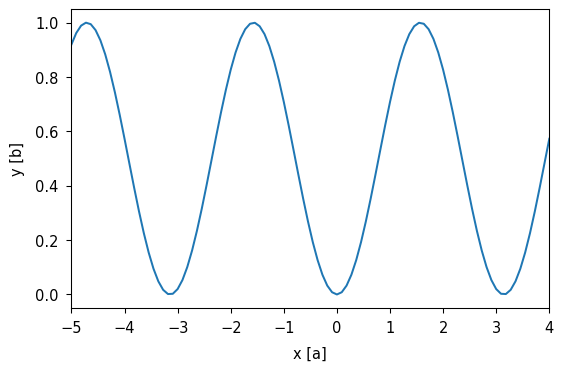

In [3]:
fig = grid.plot()
fig.show()

Figure parameters can be set with keyword arguments to `.plot()`.

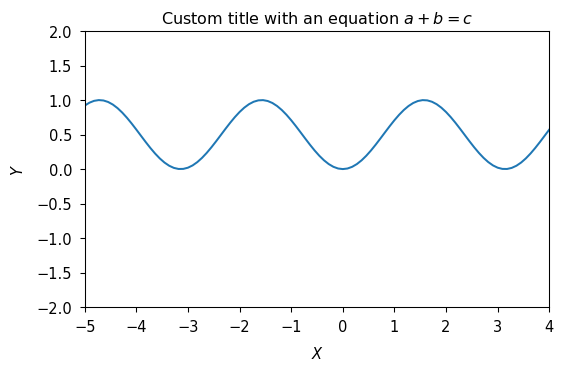

In [4]:
fig = grid.plot(
    title="Custom title with an equation $a + b = c$",
    xlabel="$X$",
    ylabel="$Y$",
    xrange=(-5,4),
    yrange=(-2,2),
)
fig.show()

Axes scales can be set using a string (`"linear"`, `"log"` or `"symlog"`).

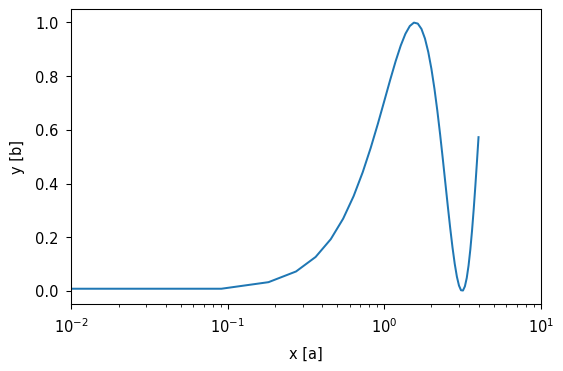

In [5]:
fig = grid.plot(
    xrange=(.01, 10),
    xscale="log"
)
fig.show()

Alternatively, `Scale` objects (`LinearScale`, `LogScale` and `SymmetricalLogScale`) are also available for more detailed plot customizations.

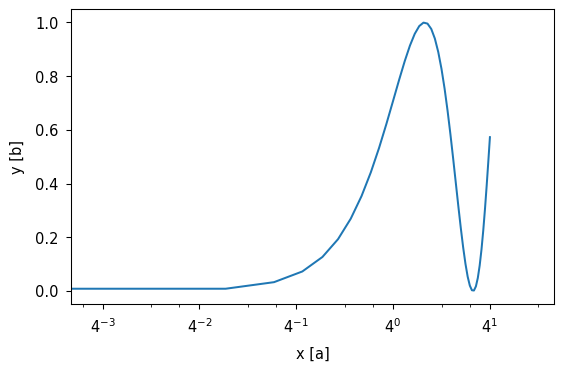

In [6]:
fig = grid.plot(
    xrange=(.01, 10),
    xscale=LogScale(base=4)
)
fig.show()

Axes ticks are also available via the keyword arguments `xticks` and `yticks`, that can receive any sequence representing the ticks' values.

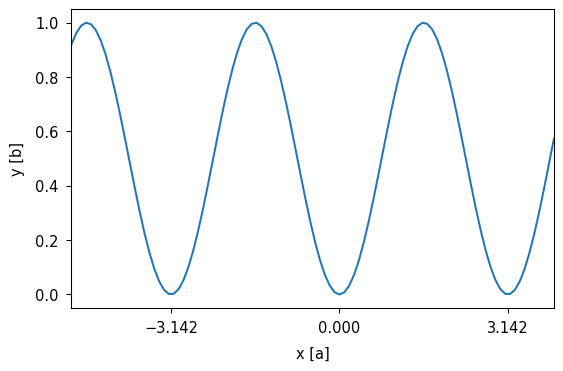

In [7]:
fig = grid.plot(
    xticks=(-np.pi, 0, np.pi)
)
fig.show()

Alternatively, `Ticks` objects can be passed to set both `values` and `labels`.

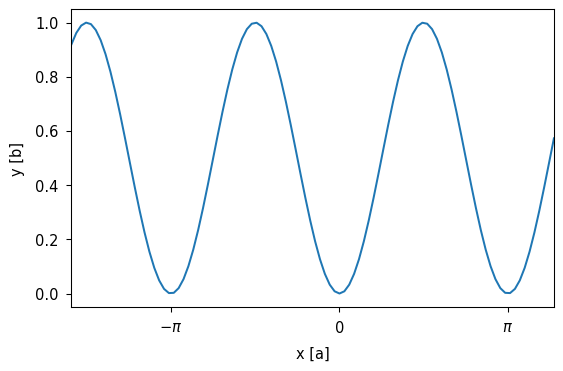

In [8]:
fig = grid.plot(
    xticks=Ticks(values=(-np.pi, 0, np.pi), labels=("$-\pi$", "$0$", "$\pi$"))
)
fig.show()

To set parameters specific to the desired plot kind, a `PlotKind` object should be passed to the keyword argument `kind`. Available plot kinds are `Line`, `Scatter` and `Image`.

In [9]:
x = np.linspace(start=-10, stop=+10, num=50)
grid = GridArray.from_array(
    np.exp(-(x/2)**2),
    label="y",
    unit="b",
    axes=[Axis.from_array(x, label="x", unit="a")]
)

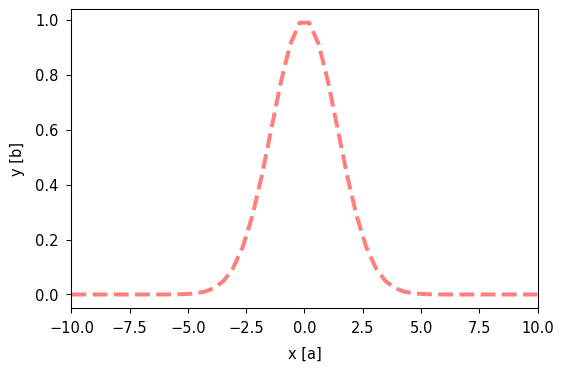

In [10]:
fig = grid.plot(
    kind=Line(color="red", style="dashed", width=3, alpha=.5)
)
fig.show()

`PlotKind` objects such as `Line` contain all styling options available for that plot kind.

In [11]:
Line?

Init signature:
Line(
    color: Union[str, NoneType] = None,
    style: Union[str, NoneType] = None,
    width: Union[int, float, NoneType] = None,
    alpha: Union[int, float, NoneType] = None,
) -> None
Docstring:      Line(color: Union[str, NoneType] = None, style: Union[str, NoneType] = None, width: Union[int, float, NoneType] = None, alpha: Union[int, float, NoneType] = None)
File:           /workspaces/nata-dev/nata/plots/kinds.py
Type:           type
Subclasses:     


The same `GridArray` can be plotted using different plot kinds. For example, the previous object `grid` can be plotted using a scatter plot.

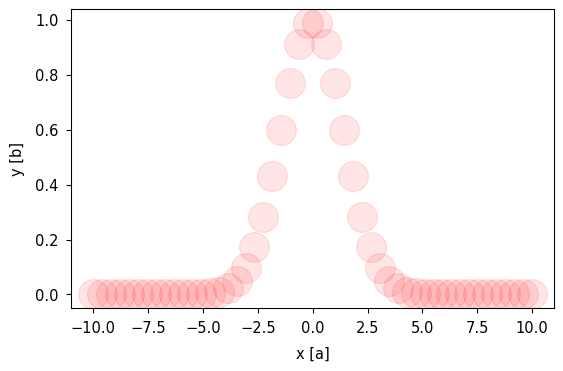

In [12]:
fig = grid.plot(
    kind=Scatter(color="red", style=".", size=2000, alpha=.1)
)
fig.show()

In [13]:
Scatter?

Init signature:
Scatter(
    color: Union[str, NoneType] = None,
    style: Union[str, NoneType] = None,
    size: Union[int, float, NoneType] = None,
    alpha: Union[int, float, NoneType] = None,
    colorbar: Union[nata.plots.elements.Colorbar, NoneType] = None,
) -> None
Docstring:      Scatter(color: Union[str, NoneType] = None, style: Union[str, NoneType] = None, size: Union[int, float, NoneType] = None, alpha: Union[int, float, NoneType] = None, colorbar: Union[nata.plots.elements.Colorbar, NoneType] = None)
File:           /workspaces/nata-dev/nata/plots/kinds.py
Type:           type
Subclasses:     


In [14]:
x = np.linspace(0, 10*np.pi, 101)
y = np.linspace(0, 10*np.pi, 201)

X,Y = np.meshgrid(x, y, indexing="ij")

grid = GridArray.from_array(
    np.sin(X) + np.sin(2*Y),
    name="dataset",
    label="$y$",
    unit="$y_a$",
    axes=[
        Axis.from_array(x, name="x1", label="$x_1$", unit="$a$"),
        Axis.from_array(y, name="x2", label="$x_2$", unit="$b$")
    ]
)

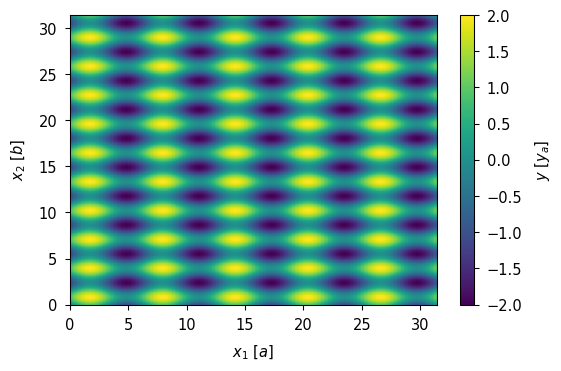

In [15]:
fig = grid.plot()
fig.show()

The colorbar of image plots can be customized by passing a `Colorbar` object to the keyword argument `colorbar`.

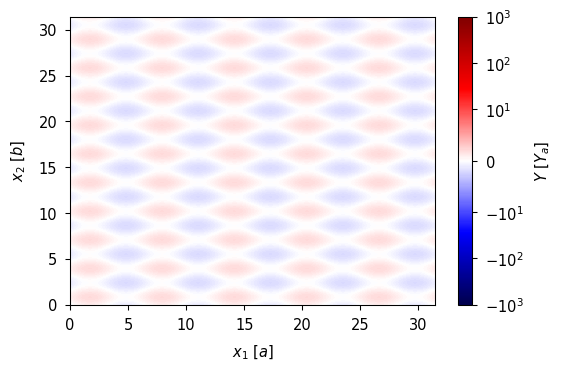

In [16]:
fig = grid.plot(
    kind=Image(
        crange=(-1e3,1e3),
        cmap="seismic",
        cscale=SymmetricalLogScale(linthresh=10),
        colorbar=Colorbar(label="$Y$ [$Y_a$]", ticks=(-1e3, -1e2, -1e1, 0, 1e1, 1e2, 1e3))
    ),
)
fig.show()

## Themes

The `.plot()` plugin also accepts a `theme` argument that controls the aspect of the output figure. This argument can be a string (`"light"` or `"dark"`).

In [17]:
x = np.linspace(start=-10, stop=+10, num=50)
grid = GridArray.from_array(
    1-x**2,
    label="y",
    unit="b",
    axes=[Axis.from_array(x, label="x", unit="a")]
)

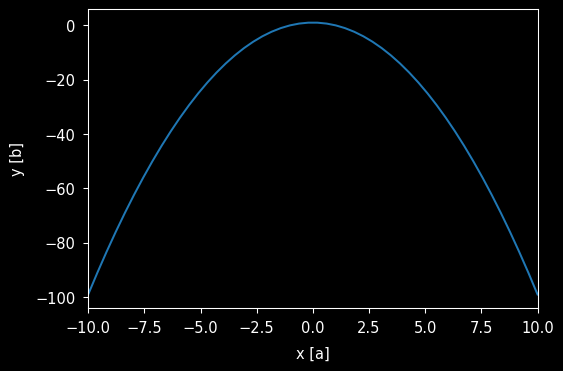

In [18]:
fig = grid.plot(theme="dark")
fig.show()

A `Theme` object can also be passed to the `theme` argument. `Theme` objects can be customized by being created according to the parameters:
- `name`: which selects the theme among the default available themes)
- `path`: path a file with custom plot parameters
- `extra`: dictionary with custom plot parameters

The plot parameters are applied in the order presented above, i.e. parameters in `extra` override parameters in `path`, and these override parameters deinfed in the default style `name`. The plot parameters should be applicable to the plotting backend in use, which is `matplotlib`. For more information on these parameters see [this link](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

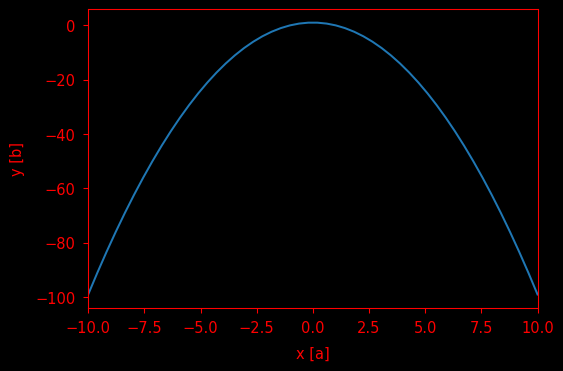

In [19]:
fig = grid.plot(
    theme=Theme(
        name="dark", 
        path="resources/custom.rc"
    )
)
fig.show()

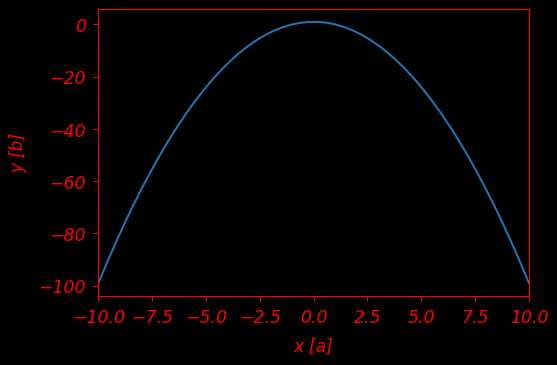

In [20]:
fig = grid.plot(
    theme=Theme(
        name="dark", 
        path="resources/custom.rc", 
        extra={"font.style": "italic", "font.size": 13}
    )
)
fig.show()

## Interactivity

When plotting a `GridDataset`, an interactive figure will be shown by default, with a slider to control the time corresponding to the data in display. The argument `start` can be used to select the index of the data to be shown when the `.plot()` plugin is first ran. The `.plot()` plugin accepts all arguments also available in its `GridArray` counterpart.

In [21]:
multiple_grids = GridDataset.from_path(examples.grids / "*")
multiple_grids.plot(
    start=2,
    yrange=(-.25, .25)
)

Output()